In [2]:
from MCG_module import MCG_g, MCG_tau_a, MCG_differential
import csv
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('default')
from pathlib import Path

# This function helps find the index of closest element to a value in an array
def find_nearest(array, value):
    i = np.abs(array - value).argmin()
    return i

# I is the nuclear spin.
I = 2.0
# J are the atomic spins, they must be apart by 1!
Jlist = [0.5,1.5,2.5]
# A are the corresponding hyperfine constants in Hz for each J. Also known as A_J.
# Since we are switching to Lorentz distribution along A we don't need this any more.
#Alist = [27589461401.0,5141611679.0,569522893.39]

# All times are in seconds, so remember to convert them to picoseconds (e-12)!
# tau_a is the mean atomic lifetime
tau_a = 10e-12
# tau_n is the mean nuclear lifetime
tau_n = 30e-12

This cell plots $G_k$ over the g-factor; atomic lifetime $\tau_a$ is fixed.

<IPython.core.display.Javascript object>


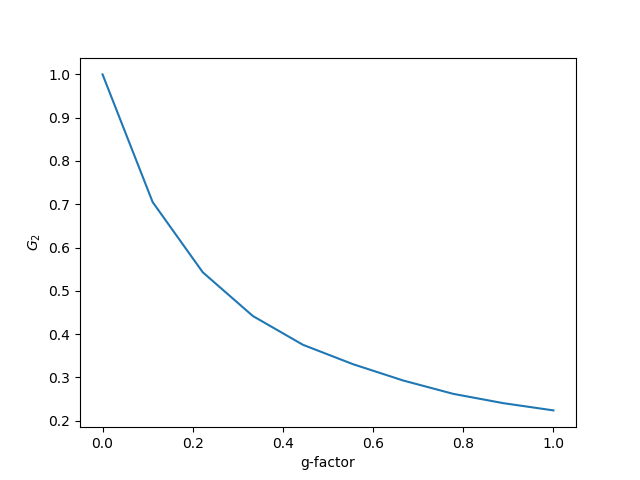

File saved as 'G2vary_g_tau_a_fixed1.0ps_0.0-1.0.csv' and 'G2vary_g_tau_a_fixed1.0ps_0.0-1.0.pdf'


In [4]:
# 
k = 2
tau_a = 1e-12
number_of_trials = 10000
initial = 0.0
final = 1.0
steps = 10
cauchy_size=100000
cauchy_factor=2500

gf_list, Gk_avg_list = MCG_g(k,I,Jlist,tau_n,float(tau_a),number_of_trials=number_of_trials,initial=initial, final=final, steps=steps)
vary_g = zip(gf_list,Gk_avg_list)
filename = f'G{k}vary_g_tau_a_fixed{tau_a*1e12}ps_{initial}-{final}'
with open(f'{filename}.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(vary_g)
plt.close()
plt.plot(gf_list,Gk_avg_list)
plt.xlabel('g-factor')
plt.ylabel(f'$G_{k}$')
plt.figtext(0.99, -0.06, f"$\\tau_n$: {tau_n*1e12} ps    $\\tau_a$: {tau_a*1e12} ps    initial gf: {initial}    final gf: {final}\n cauchy factor:{cauchy_factor}    # of steps: {steps}    # of trials per step: {number_of_trials}",horizontalalignment='right')
plt.savefig(f'{filename}.pdf',bbox_inches = 'tight')
print(f"File saved as '{filename}.csv' and '{filename}.pdf'")


This cell plots $G_k$ over the atomic lifetime $\tau_a$; the g-factor is fixed.

<IPython.core.display.Javascript object>


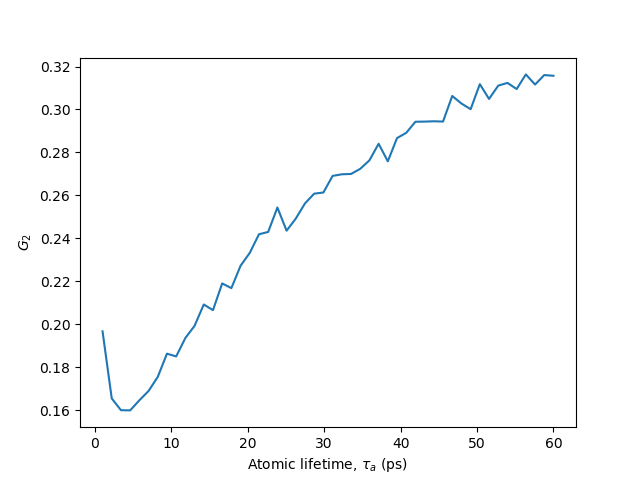

File saved as 'G2_tau_n_60.0ps_vary_tau_a_g_fixed1.4_1.0ps-60.0ps.csv' and 'G2_tau_n_60.0ps_vary_tau_a_g_fixed1.4_1.0ps-60.0ps.pdf'


In [6]:
# 
tau_n = 60e-12
k = 2
gf = 1.4
number_of_trials=10000
initial = 1e-12
#final = 7*tau_n
final = 60e-12
steps = 50
cauchy_size=100000
cauchy_factor=2500

tau_a_list, Gk_avg_list = MCG_tau_a(k,I,Jlist,tau_n,gf=gf,number_of_trials=number_of_trials,initial=initial, final=final, steps=steps,cauchy_factor=cauchy_factor, cauchy_size=cauchy_size)
vary_tau_a = zip(tau_a_list,Gk_avg_list)
filename = f'G{k}_tau_n_{tau_n*1e12}ps_vary_tau_a_g_fixed{gf}_{initial*1e12}ps-{final*1e12}ps'
with open(f'{filename}.csv', 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(vary_tau_a)
plt.close()
plt.plot([i*1e12 for i in tau_a_list],Gk_avg_list)
plt.xlabel('Atomic lifetime, $\\tau_a$ (ps)')
plt.ylabel(f'$G_{k}$')
plt.figtext(0.99, -0.06, f"$\\tau_n$: {tau_n*1e12} ps    gf: {gf}    initial $\\tau_a$: {initial*1e12} ps    final $\\tau_a$: {final*1e12} ps\n  cauchy factor:{cauchy_factor}    # of steps: {steps}    # of trials per step: {number_of_trials}",horizontalalignment='right')
plt.savefig(f'{filename}.pdf',bbox_inches = 'tight')
print(f"File saved as '{filename}.csv' and '{filename}.pdf'")


This cell plots log plots of $G_k$ over time (time-differential log plot).

In [0]:
# 
filename='G2diff1.0ps_0.5gf_1.0ps-70.0ps'
xlist = []
ylist = []
with open(f'{filename}.csv', 'r', newline='') as csvFile:
    csv_reader = csv.reader(csvFile, delimiter=',')
    for row in csv_reader:
        xlist.append(float(row[0]))
        ylist.append(float(row[1]))
plt.figtext(0.99, -0.06, f"$\\tau_n$: {tau_n*1e12} ps    $\\tau_a$: {tau_a*1e12} ps   gf: {gf}    initial t: {initial*1e12} ps    final t: {final*1e12} ps\n cauchy factor:{cauchy_factor:.3}    # of steps: {steps}    # of trials: {number_of_trials}",horizontalalignment='right')
plt.yscale("log")
plt.xscale("log")
plt.plot(xlist,ylist)
plt.xlabel('time, t (log[s])')
plt.ylabel(f'$G_{k}$')


This cell replots $G_k$ over varying atomic lifetimes from a csv file generated beforehand.

In [0]:
# 
filename="G2_tau_n_30ps_vary_tau_a_g_fixed1.0_5.0ps-3000.0ps"
xlist = []
ylist = []
with open(f'{filename}.csv', 'r', newline='') as csvFile:
    csv_reader = csv.reader(csvFile, delimiter=',')
    for row in csv_reader:
        xlist.append(float(row[0]))
        ylist.append(float(row[1]))
plt.plot([i*1e12 for i in xlist],ylist)
plt.xlabel('Atomic lifetime, $\\tau_a$ (ps)')
plt.ylabel(f'$G_{k}$')
plt.figtext(0.99, -0.06, f"$\\tau_n$: {tau_n*1e12} ps    gf: {gf}    initial $\\tau_a$: {initial*1e12} ps    final $\\tau_a$: {final*1e12} ps\n  cauchy factor:{cauchy_factor:.3}    # of steps: {steps}    # of trials per step: {number_of_trials}",horizontalalignment='right')
plt.savefig(f'{filename}.pdf',bbox_inches = 'tight')
